In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import InceptionV3, VGG16, InceptionResNetV2, VGG19, ResNet101, ResNet101V2, ResNet152, ResNet152V2, ResNet50, ResNet50V2, Xception, MobileNet, MobileNetV2
from time import perf_counter 
import os
import cv2

In [10]:
os.environ['KAGGLE_USERNAME']="ridhimamishra1022 "
os.environ['KAGGLE_KEY']="fa8470910f250f584b6939b22bd6eb20"

In [11]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

401 - Unauthorized


In [4]:
!unzip face-expression-recognition-dataset.zip

unzip:  cannot find or open face-expression-recognition-dataset.zip, face-expression-recognition-dataset.zip.zip or face-expression-recognition-dataset.zip.ZIP.


In [23]:
batch_size = 100
img_height = 256
img_width = 256


In [24]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/dataeeeeee/images/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 28821 files belonging to 7 classes.


In [25]:
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/dataeeeeee/images/validation/',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 7066 files belonging to 7 classes.


In [32]:
model1= Sequential([
                   Conv2D(32, 3, input_shape=(256,256,3), activation='relu', padding="same"),
                   MaxPooling2D(),
                   Conv2D(64, 3, activation='relu', padding="same"),
                   Conv2D(64, 3, activation='relu', padding="same"),
                   MaxPooling2D(),
                   Conv2D(128, 3, activation='relu',padding="same" ),
                   Conv2D(128, 3, activation='relu', padding="same"),
                   MaxPooling2D(),
                   Conv2D(256, 3, activation='relu', padding="same"),
                   Conv2D(256, 3, activation='relu', padding="same"),
                   MaxPooling2D(),
                   Conv2D(512, 3, activation='relu', padding="same"),
                   Flatten(),
                   Dense(512, activation='relu'),
                   Dense(256, activation='relu'),
                   Dense(64, activation='relu'),
                   Dense(7, activation='softmax')                
])

In [33]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 conv2d_18 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 128)      

In [34]:
model1.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [35]:
checkpoint= tf.keras.callbacks.ModelCheckpoint('model_checkpoint.h5', save_best_only=True, verbose=1)

In [36]:
callbacks= [tf.keras.callbacks.EarlyStopping(patience=7, monitor='val_loss'),
            tf.keras.callbacks.TensorBoard(log_dir='Logs')]

In [37]:
model1.fit(training_ds, validation_data=validation_ds, epochs=20, callbacks=[callbacks])

Epoch 1/20
289/289 [==============================] - 108s 318ms/step - loss: 2.5966 - accuracy: 0.2519 - val_loss: 1.7003 - val_accuracy: 0.3389
Epoch 2/20
289/289 [==============================] - 77s 264ms/step - loss: 1.6526 - accuracy: 0.3540 - val_loss: 1.5705 - val_accuracy: 0.3992
Epoch 3/20
289/289 [==============================] - 78s 266ms/step - loss: 1.5068 - accuracy: 0.4202 - val_loss: 1.4466 - val_accuracy: 0.4445
Epoch 4/20
289/289 [==============================] - 78s 265ms/step - loss: 1.3723 - accuracy: 0.4715 - val_loss: 1.4076 - val_accuracy: 0.4699
Epoch 5/20
289/289 [==============================] - 77s 265ms/step - loss: 1.2164 - accuracy: 0.5361 - val_loss: 1.4971 - val_accuracy: 0.4825
Epoch 6/20
289/289 [==============================] - 77s 264ms/step - loss: 1.0211 - accuracy: 0.6164 - val_loss: 1.6811 - val_accuracy: 0.4826
Epoch 7/20
289/289 [==============================] - 78s 267ms/step - loss: 0.8111 - accuracy: 0.6993 - val_loss: 2.0642 - val_a

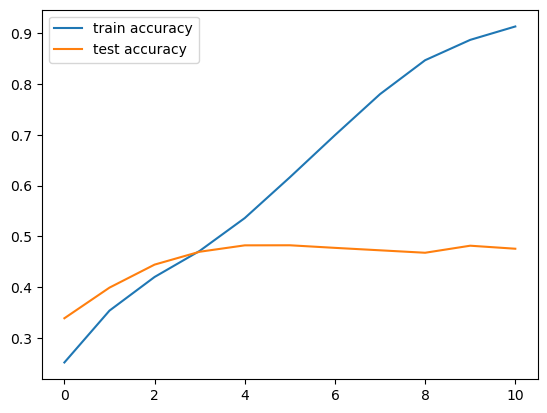

In [38]:
plt.plot(model1.history.history['accuracy'], label='train accuracy')
plt.plot(model1.history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

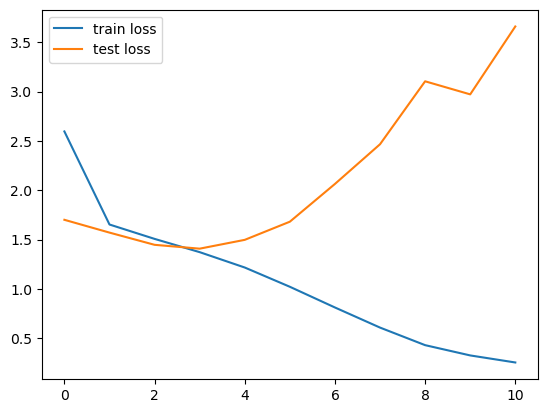

In [39]:
plt.plot(model1.history.history['loss'], label='train loss')
plt.plot(model1.history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 21ms/step


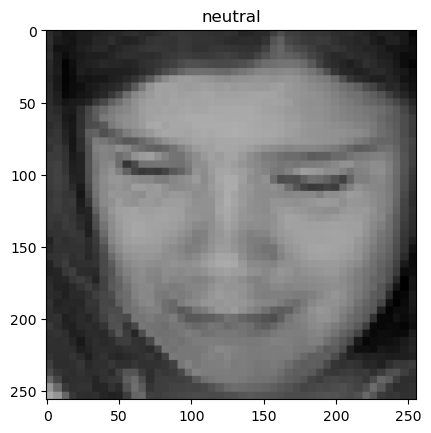

1/1 [==============================] - 0s 30ms/step


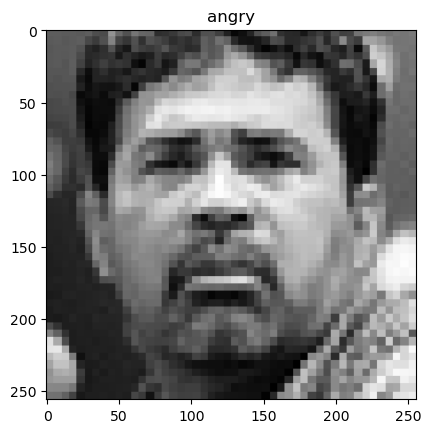

1/1 [==============================] - 0s 29ms/step


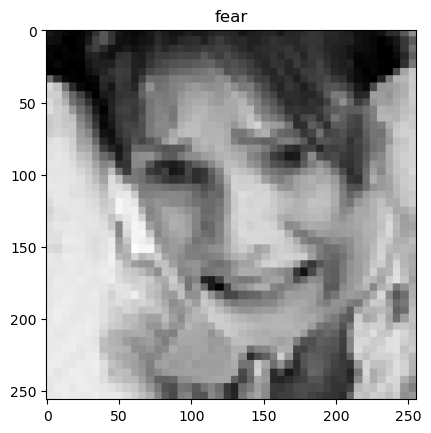

In [116]:
from keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
import numpy as np
import matplotlib.pyplot as plt


# Define the list of input image paths
image_paths = ['/kaggle/input/dataeeeeee/images/validation/sad/1003.jpg', '/kaggle/input/dataeeeeee/images/validation/angry/10148.jpg', '/kaggle/input/dataeeeeee/images/validation/fear/10044.jpg']

# Define the list of class names
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'suprise']

# Iterate over the input images and display the predicted class label for each image
for image_path in image_paths:
    # Load and preprocess the image
    img = load_img(image_path, target_size=(256,256))
    img_array = img_to_array(img)
    

    # Make a prediction
    input_array = np.expand_dims(img_array, axis=0)
    predictions = model1.predict(input_array)

    # Get the predicted class
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_index]

    # Display the image and predicted class label
    plt.imshow(img)
    plt.title(predicted_class_name)
    plt.show()


In [118]:
vgg16= VGG16(include_top=False, input_shape=(256,256,3), classes=7)

In [119]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [120]:
X=vgg16.output
X=Flatten()(X)
X=Dense(1024, activation='relu')(X)
X=Dropout(0.3)(X)
X=Dense(512, activation='relu')(X)
X=Dropout(0.2)(X)
X=Dense(256, activation='relu')(X)
output=Dense(7, activation='softmax')(X)

In [121]:
model2=Model(inputs=vgg16.input, outputs=output)

In [122]:
model2.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [123]:
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [124]:
checkpoint= tf.keras.callbacks.ModelCheckpoint('vgg16.h5', save_best_only=True, verbose=1)

In [125]:
callbacks= [tf.keras.callbacks.EarlyStopping(patience=7, monitor='val_loss')]

In [126]:
model2.fit(training_ds, validation_data=validation_ds,epochs=20,callbacks=[callbacks])

Epoch 1/20
289/289 [==============================] - 340s 1s/step - loss: 2.3113 - accuracy: 0.2554 - val_loss: 1.8009 - val_accuracy: 0.2536
Epoch 2/20
289/289 [==============================] - 335s 1s/step - loss: 1.7404 - accuracy: 0.2938 - val_loss: 1.6821 - val_accuracy: 0.3337
Epoch 3/20
289/289 [==============================] - 336s 1s/step - loss: 1.6645 - accuracy: 0.3369 - val_loss: 1.6605 - val_accuracy: 0.3289
Epoch 4/20
289/289 [==============================] - 335s 1s/step - loss: 1.5560 - accuracy: 0.3905 - val_loss: 1.5936 - val_accuracy: 0.3742
Epoch 5/20
289/289 [==============================] - 337s 1s/step - loss: 1.4617 - accuracy: 0.4305 - val_loss: 1.4084 - val_accuracy: 0.4510
Epoch 6/20
289/289 [==============================] - 336s 1s/step - loss: 1.3871 - accuracy: 0.4587 - val_loss: 1.3600 - val_accuracy: 0.4747
Epoch 7/20
289/289 [==============================] - 336s 1s/step - loss: 1.3241 - accuracy: 0.4851 - val_loss: 1.2910 - val_accuracy: 0.5010

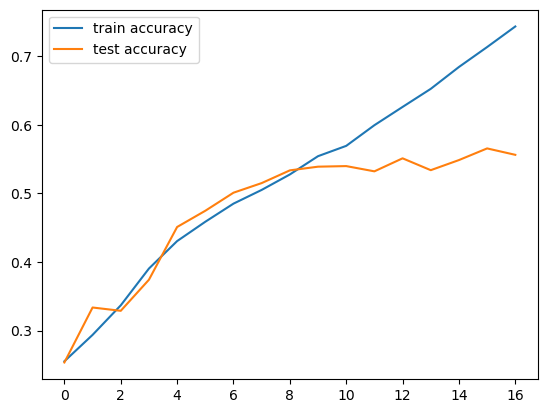

In [127]:
plt.plot(model2.history.history['accuracy'], label='train accuracy')
plt.plot(model2.history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

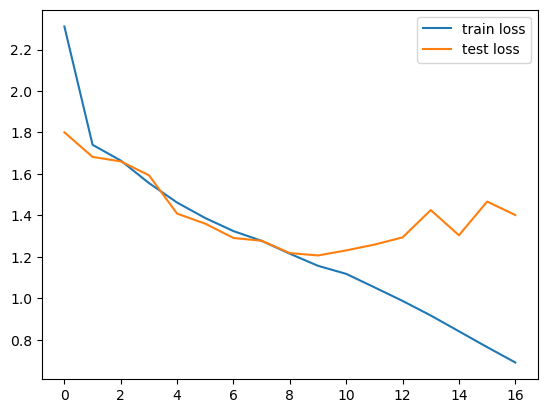

In [128]:
plt.plot(model2.history.history['loss'], label='train loss')
plt.plot(model2.history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

In [103]:
resnet50= ResNet50(include_top=False, input_shape=(256,256,3), classes=7)

In [98]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [99]:
X=resnet50.output
X=Flatten()(X)
X=Dense(1024, activation='relu')(X)
X=Dropout(0.3)(X)
X=Dense(512, activation='relu')(X)
X=Dropout(0.2)(X)
X=Dense(256, activation='relu')(X)
output=Dense(7, activation='softmax')(X)

In [100]:
model3=Model(inputs=resnet50.input, outputs=output)

In [104]:
model3.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [102]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [105]:
checkpoint= tf.keras.callbacks.ModelCheckpoint('resnet50.h5', save_best_only=True, verbose=1)

In [106]:
callbacks= [tf.keras.callbacks.EarlyStopping(patience=7, monitor='val_loss')]

In [110]:
model3.fit(training_ds,validation_data=validation_ds,epochs=20, callbacks=[callbacks])

Epoch 1/20
289/289 [==============================] - 201s 693ms/step - loss: 1.7421 - accuracy: 0.3549 - val_loss: 3.8061 - val_accuracy: 0.3081
Epoch 2/20
289/289 [==============================] - 199s 688ms/step - loss: 1.3147 - accuracy: 0.4904 - val_loss: 1.8408 - val_accuracy: 0.4543
Epoch 3/20
289/289 [==============================] - 203s 702ms/step - loss: 1.1736 - accuracy: 0.5498 - val_loss: 1.5206 - val_accuracy: 0.4849
Epoch 4/20
289/289 [==============================] - 201s 692ms/step - loss: 1.0537 - accuracy: 0.6027 - val_loss: 1.2838 - val_accuracy: 0.5317
Epoch 5/20
289/289 [==============================] - 198s 682ms/step - loss: 0.9483 - accuracy: 0.6426 - val_loss: 1.5390 - val_accuracy: 0.4363
Epoch 6/20
289/289 [==============================] - 199s 685ms/step - loss: 0.8380 - accuracy: 0.6876 - val_loss: 1.4773 - val_accuracy: 0.4970
Epoch 7/20
289/289 [==============================] - 199s 687ms/step - loss: 0.7168 - accuracy: 0.7328 - val_loss: 2.0048 -

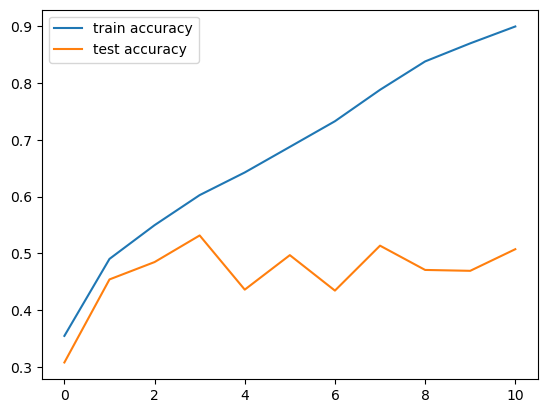

In [111]:
plt.plot(model3.history.history['accuracy'], label='train accuracy')
plt.plot(model3.history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

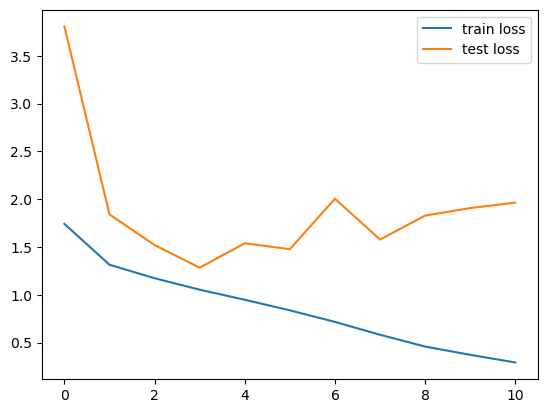

In [112]:
plt.plot(model3.history.history['loss'], label='train loss')
plt.plot(model3.history.history['val_loss'], label='test loss')
plt.legend()
plt.show()